In [1]:
from dask.distributed import LocalCluster
# from dask_jobqueue import SLURMCluster
from dask.distributed import Client

cluster = LocalCluster()
# cluster = SLURMCluster(cores=24, name='test', walltime='00:30:00',
#                        job_extra=['--constraint=HSW24','--exclusive','--nodes=1'], 
#                        memory='128GB', interface='ib0'
#                       ) 
# cluster.scale(24)
# # cluster.adapt(minimum=10, maximum=196)

client = Client(cluster)
# client = Client(scheduler_file="/home/ad/briolf/scheduler.json")
# client = Client()
client

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:35445 Dashboard: http://127.0.0.1:37399/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import xarray as xr
import numpy as np
import numcodecs
import xscale
import gsw
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os.path as op
from xhistogram.xarray import histogram as xhist

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02-S/'
xtra = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02X-S/'
scratch = '/scratch/cnt0024/hmg2840/tuchida/temp'
adac = '/scratch/cnt0024/hmg2840/tuchida/SWOT-AdAC/'

In [6]:
ds = xr.open_dataset(op.join(adac,'Interior/BLBT02/%7s/Region%02d-interior-daily_%4d-%02d.nc'
                                    % ('MEDWEST',3,2009,8)
                            )
                    )
ds

<xarray.Dataset>
Dimensions:       (deptht: 107, depthu: 107, depthv: 107, depthw: 107, time_counter: 31, x: 574, y: 675)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * depthv        (depthv) float32 0.48045477 1.5587916 ... 985.33044 1002.37274
  * depthu        (depthu) float32 0.48045477 1.5587916 ... 985.33044 1002.37274
  * deptht        (deptht) float32 0.48045477 1.5587916 ... 985.33044 1002.37274
  * depthw        (depthw) float32 0.0 1.0000261 ... 976.85284 993.83716
  * time_counter  (time_counter) datetime64[ns] 2009-08-01 ... 2009-08-31
    depth         (y, x) float32 ...
    lat           (y, x) float32 ...
    lon           (y, x) float32 ...
    e1t           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e1f           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2v           (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    votemper      (time_counter, deptht, y, x) float32 ...
    vosaline      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, depthw, y, x) float32 ...
    vomecrty      (time_counter, depthv, y, x) float32 ...
    vozocrtx      (time_counter, depthu, y, x) float32 ...
    tmask         (deptht, y, x) int8 ...
    umask         (depthu, y, x) int8 ...
    vmask         (depthv, y, x) int8 ...
    fmask         (deptht, y, x) int8 ...
    e3t_0         (deptht, y, x) float64 ...
    e3u_0         (depthu, y, x) float64 ...
    e3v_0         (depthv, y, x) float64 ...
    e3w_0         (depthw, y, x) float64 ...

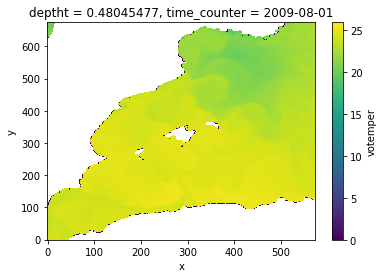

In [7]:
ds.votemper.where(ds.tmask!=0.)[0,0].plot()

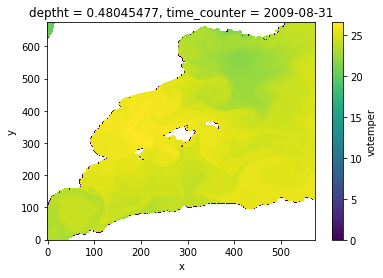

In [8]:
ds.votemper.where(ds.tmask!=0.)[-1,0].plot()